In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [45]:
data = pd.read_csv('F:\Desktop\IDS\IDS-2019-Prof. PK\Dataset\crime.csv', encoding="cp1252")

In [7]:
data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [4]:
data.shape

(319073, 17)

In [11]:
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [26]:
data['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [21]:
del data['SHOOTING']

In [11]:
data.mode()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I162030584,3006,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,2017-06-01 00:00:00,2017,8,Friday,17,Part Three,WASHINGTON ST,42.348624,-71.082776,"(0.00000000, 0.00000000)"


In [12]:
data['DISTRICT'].value_counts()

B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64

In [12]:
data['DISTRICT'].fillna(data['DISTRICT'].value_counts().index[0],inplace=True)

In [14]:
data['UCR_PART'].value_counts()

Part Three    158553
Part Two       97569
Part One       61629
Other           1232
Name: UCR_PART, dtype: int64

In [13]:
data['UCR_PART'].fillna(data['UCR_PART'].value_counts().index[0],inplace=True)

In [16]:
data['STREET'].value_counts()[0:10]

WASHINGTON ST        14194
BLUE HILL AVE         7794
BOYLSTON ST           7221
DORCHESTER AVE        5149
TREMONT ST            4796
MASSACHUSETTS AVE     4708
HARRISON AVE          4609
CENTRE ST             4383
COMMONWEALTH AVE      4134
HYDE PARK AVE         3470
Name: STREET, dtype: int64

In [14]:
data['STREET'].fillna(data['STREET'].value_counts().index[0],inplace=True)

In [15]:
data['Lat'].mean()

42.21438105977283

In [16]:
data['Lat'].fillna(data['Lat'].mean(),inplace=True)

In [17]:
data['Long'].mean()

-70.90827235385619

In [18]:
data['Long'].median()

-71.07752376

In [19]:
#median looks much closer to the values in the dataset
data['Long'].fillna(data['Long'].median(),inplace=True)

In [22]:
data.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [3]:
data['OCCURRED_ON_DATE'][0:10]

0    2018-09-02 13:00:00
1    2018-08-21 00:00:00
2    2018-09-03 19:27:00
3    2018-09-03 21:16:00
4    2018-09-03 21:05:00
5    2018-09-03 21:09:00
6    2018-09-03 21:25:00
7    2018-09-03 20:39:37
8    2018-09-03 20:48:00
9    2018-09-03 20:38:00
Name: OCCURRED_ON_DATE, dtype: object

In [4]:
data['OCCURRED_ON_DATE'].value_counts()[0:10]

2017-06-01 00:00:00    29
2015-07-01 00:00:00    27
2016-08-01 00:00:00    27
2015-06-18 05:00:00    22
2017-08-01 00:00:00    22
2017-01-01 00:00:00    21
2016-04-01 00:00:00    20
2015-12-07 11:38:00    20
2017-05-01 00:00:00    20
2016-09-01 00:00:00    19
Name: OCCURRED_ON_DATE, dtype: int64

In [9]:
data['SHOOTING']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
319043    NaN
319044    NaN
319045    NaN
319046    NaN
319047    NaN
319048    NaN
319049    NaN
319050    NaN
319051    NaN
319052    NaN
319053    NaN
319054    NaN
319055    NaN
319056    NaN
319057    NaN
319058    NaN
319059    NaN
319060    NaN
319061    NaN
319062    NaN
319063    NaN
319064    NaN
319065    NaN
319066    NaN
319067    NaN
319068    NaN
319069    NaN
319070    NaN
319071    NaN
319072    NaN
Name: SHOOTING, Length: 319073, dtype: object

In [24]:
#VISUALISATION
data['DISTRICT'].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

Text(0.5, 0, 'District')

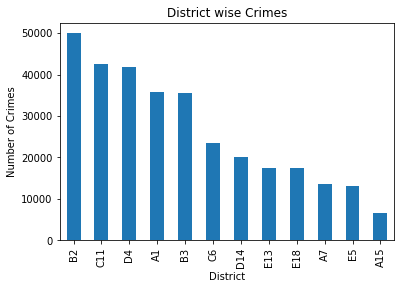

In [26]:
#plt.figure(figsize=(8,8))
data['DISTRICT'].value_counts().plot.bar()
plt.title('District wise Crimes')
plt.ylabel('Number of Crimes')
plt.xlabel('District')

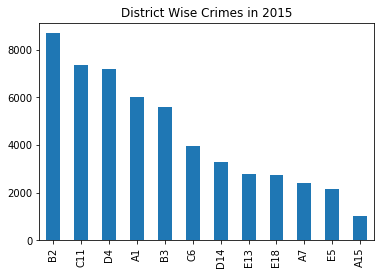

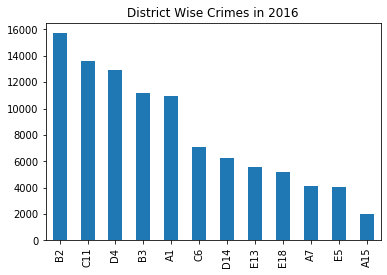

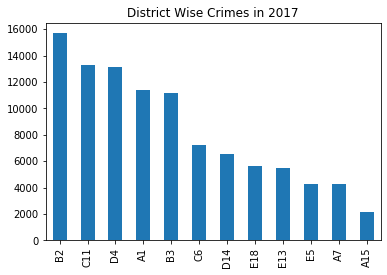

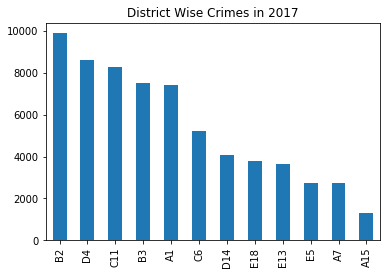

In [25]:
#Crimes in the districts for the individual years
#2015
#plt.figure(figsize=(16,8))
data['DISTRICT'].loc[data['YEAR']==2015].value_counts().plot.bar()
plt.title('District Wise Crimes in 2015')
plt.show()

#2016
#plt.figure(figsize=(16,8))
data['DISTRICT'].loc[data['YEAR']==2016].value_counts().plot.bar()
plt.title('District Wise Crimes in 2016')
plt.show()

#2017
#plt.figure(figsize=(16,8))
data['DISTRICT'].loc[data['YEAR']==2017].value_counts().plot.bar()
plt.title('District Wise Crimes in 2017')
plt.show()

#2018
#plt.figure(figsize=(16,8))
data['DISTRICT'].loc[data['YEAR']==2018].value_counts().plot.bar()
plt.title('District Wise Crimes in 2017')
plt.show()

#After loking at the graphs year by year we can conclude that the crime in the districts were consistent

In [27]:
data['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Medical Assistance', 'Assembly or Gathering Violations',
       'Larceny From Motor Vehicle', 'Residential Burglary',
       'Simple Assault', 'Restraining Order Violations', 'Violations',
       'Harassment', 'Ballistics', 'Property Found',
       'Police Service Incidents', 'Drug Violation', 'Warrant Arrests',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Aggravated Assault', 'License Plate Related Incidents',
       'Firearm Violations', 'Other Burglary', 'Arson', 'Bomb Hoax',
       'Harbor Related Incidents', 'Counterfeiting', 'Liquor Violation',
       'Firearm Discovery', 'Landlord/Tenant Disputes',
       'Missing Person Located', 'Auto Theft Recovery', 'Service',
       'Operating Und

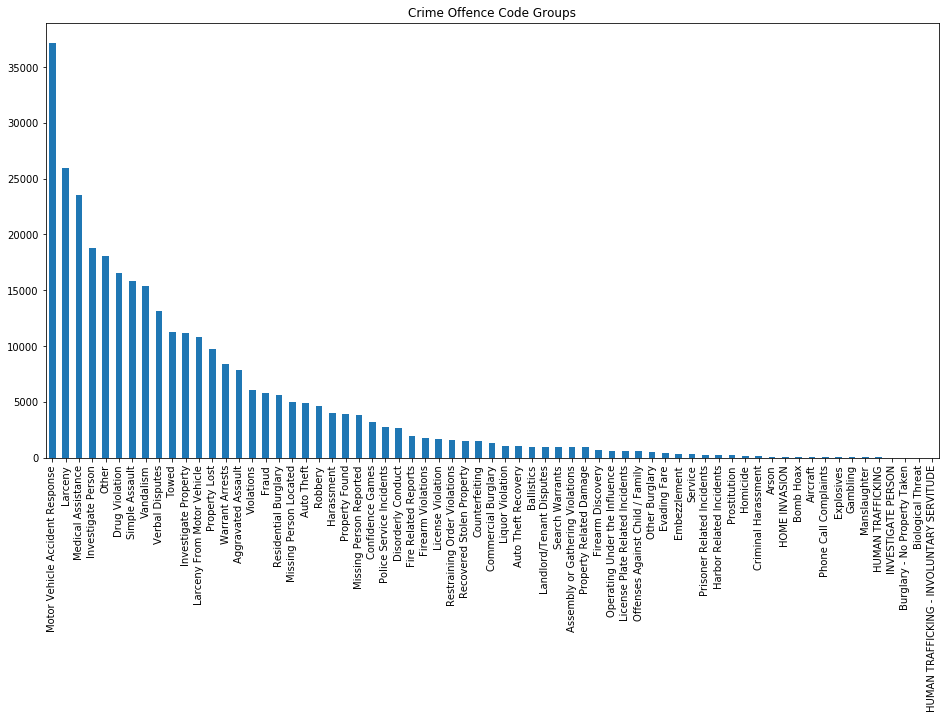

In [28]:
plt.figure(figsize=(16,8))
data['OFFENSE_CODE_GROUP'].value_counts().plot.bar()
plt.title('Crime Offence Code Groups')
plt.show()

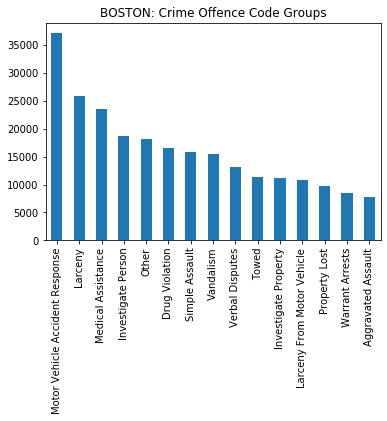

In [24]:
#plt.figure(figsize=(16,8))
data['OFFENSE_CODE_GROUP'].value_counts()[0:15].plot.bar()
plt.title('BOSTON: Crime Offence Code Groups')
plt.show()

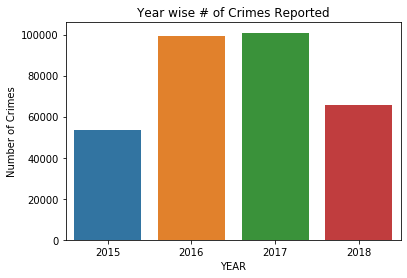

In [23]:
#plt.figure(figsize=(8,8))
sns.countplot(x='YEAR', data = data)
plt.ylabel('Number of Crimes')
plt.title('Year wise # of Crimes Reported')
plt.show()

Text(0.5, 1.0, 'Top 10 Types of Crime')

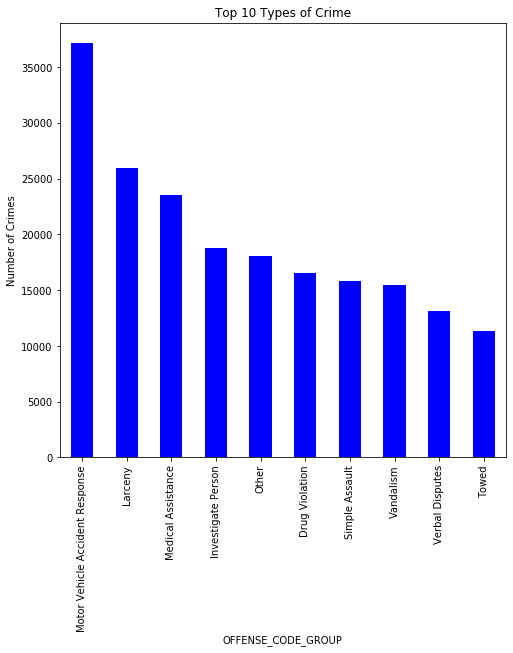

In [11]:
#top 10 types of crimes
plt.figure(figsize=(8,8))
top10ctype = data.groupby('OFFENSE_CODE_GROUP')['INCIDENT_NUMBER'].count().sort_values(ascending=False)
top10ctype = top10ctype [:10]
top10ctype.plot(kind='bar', color='blue')
plt.ylabel('Number of Crimes')
plt.title('Top 10 Types of Crime')

#Motor vehicle accident is high compared to all other crimes

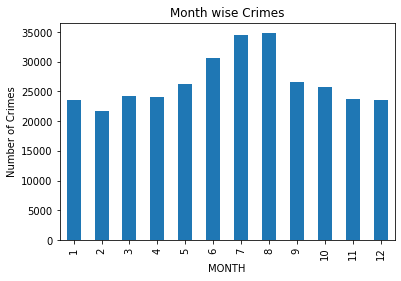

In [22]:
#comparing crimes for months
#plt.figure(figsize=(8,8))
data.groupby(['MONTH'])['INCIDENT_NUMBER'].count().plot(kind = 'bar')
plt.ylabel('Number of Crimes')
plt.title('Month wise Crimes')
plt.show()

In [29]:
data['MONTH'].value_counts()           #Crime rate is high in the period of june-august

8     34823
7     34556
6     30568
9     26543
5     26199
10    25737
3     24146
4     24086
11    23675
1     23610
12    23477
2     21653
Name: MONTH, dtype: int64

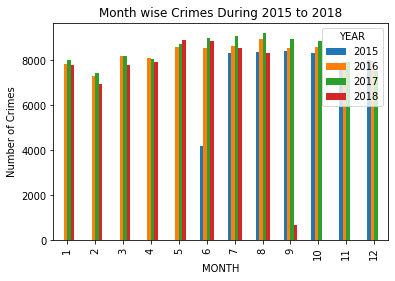

In [20]:
#Comparing crimes per month from 2015 to 2018
#plt.figure(figsize=(8,8))
data.groupby(['MONTH', 'YEAR'])['INCIDENT_NUMBER'].count().unstack(1).plot(kind = 'bar')
plt.ylabel('Number of Crimes')
plt.title('Month wise Crimes During 2015 to 2018')
plt.show()

<Figure size 2304x1152 with 0 Axes>

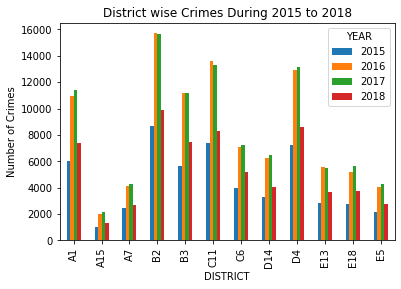

In [14]:
#Comparing crimes IN every district from 2015 to 2018
plt.figure(figsize=(32,16))
data.groupby(['DISTRICT', 'YEAR'])['INCIDENT_NUMBER'].count().unstack().plot(kind = 'bar')
plt.ylabel('Number of Crimes')
plt.title('District wise Crimes During 2015 to 2018')
plt.show()

In [17]:
data['YEAR'].value_counts()

2017    100886
2016     99114
2018     65685
2015     53388
Name: YEAR, dtype: int64

In [27]:
data['DAY_OF_WEEK'].value_counts()                  #comparing days of the week friday has most number of crimes

Friday       48495
Wednesday    46729
Thursday     46656
Tuesday      46383
Monday       45679
Saturday     44818
Sunday       40313
Name: DAY_OF_WEEK, dtype: int64

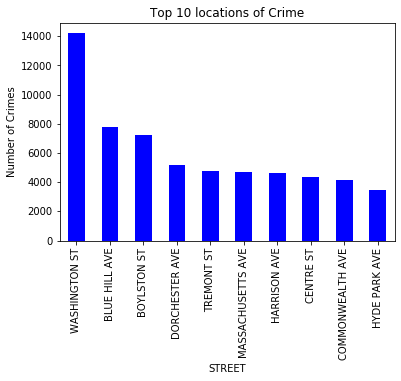

In [39]:
#plt.figure(figsize=(16,8))
top10loc = data.groupby('STREET')['INCIDENT_NUMBER'].count().sort_values(ascending=False)
top10loc = top10loc [:10]
top10loc.plot(kind='bar', color='blue')
plt.ylabel('Number of Crimes')
plt.title('Top 10 locations of Crime')
plt.show()

Text(0.5, 1.0, 'Hour wise # of Crimes Reported')

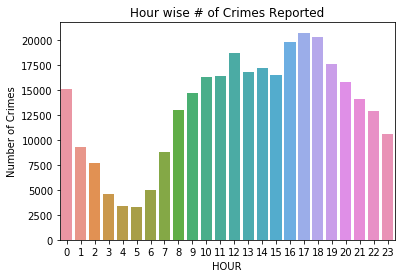

In [16]:
#plt.figure(figsize=(16,8))
sns.countplot(x='HOUR', data = data)
plt.ylabel('Number of Crimes')
plt.title('Hour wise # of Crimes Reported')

Text(-8.950000000000003, 0.5, 'Count')

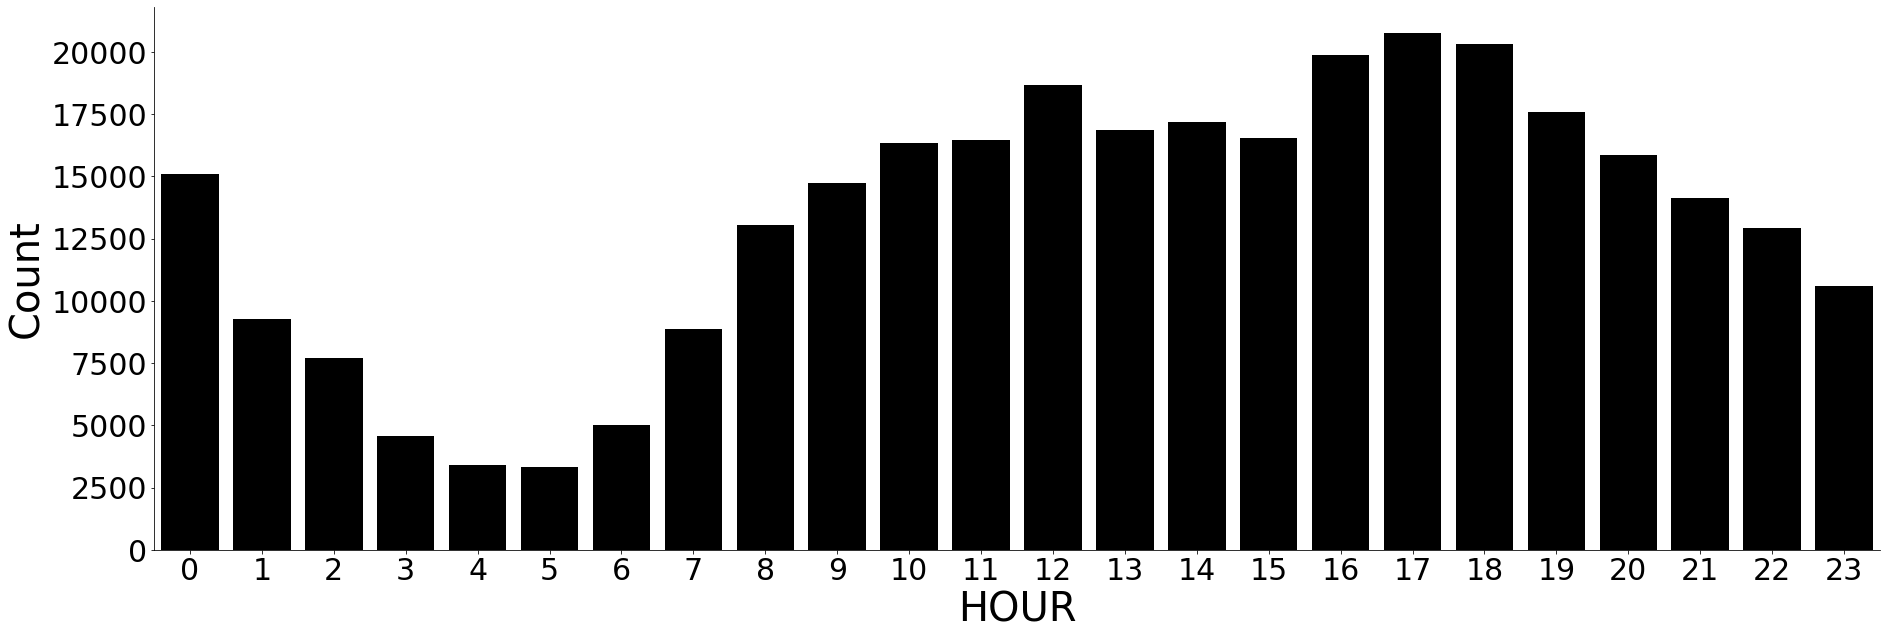

In [6]:
#crimes by hour of the day 
sns.catplot(x='HOUR',
           kind='count',
            height=8.27, 
            aspect=3,
            color='black',
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('HOUR', fontsize=40)
plt.ylabel('Count', fontsize=40)

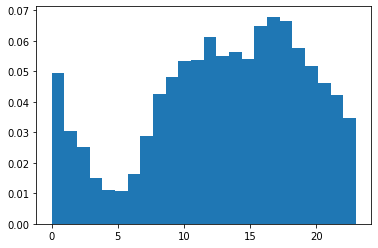

In [11]:
plt.hist(data['HOUR'],bins=24,density=True)
plt.show()

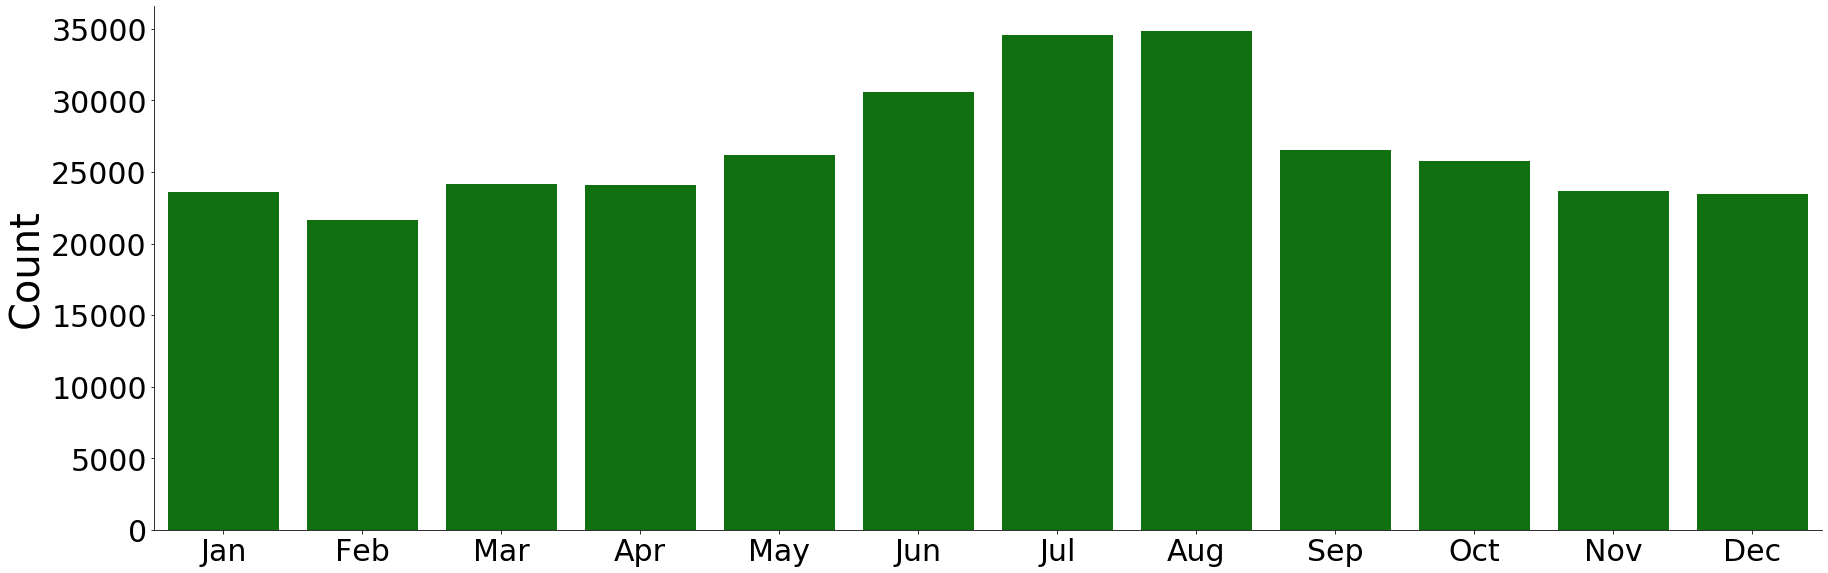

In [46]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='MONTH',
           kind='count',
            height=8, 
            aspect=3,
            color='green',
           data=data)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)
plt.show()

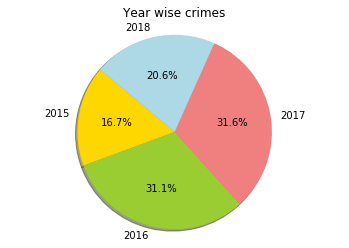

In [23]:
labels = '2015','2016','2017','2018'
sizes = [53388,99114,100886,65685]
colors = ['gold', 'yellowgreen', 'lightcoral','lightblue']
 # explode 1st slice

# Plot
plt.pie(sizes,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Year wise crimes")
plt.axis('equal')
plt.show()              

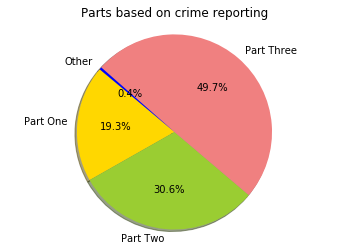

In [28]:
labels = 'Part One','Part Two','Part Three','Other'
sizes = [61629,97569,158553,1232]
colors = ['gold', 'yellowgreen', 'lightcoral','blue']
 # explode 1st slice

# Plot
plt.pie(sizes,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Parts based on crime reporting")
plt.axis('equal')
plt.show()                                                  

[-71.074038   -71.06235969 -71.05427134 -71.04618298 -71.03450468]


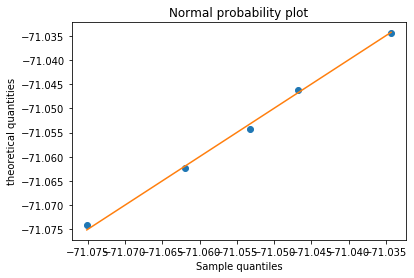

[-87.19493077 -86.38668694 -85.99737526 ... -55.81916944 -55.42985777
 -54.62161394]


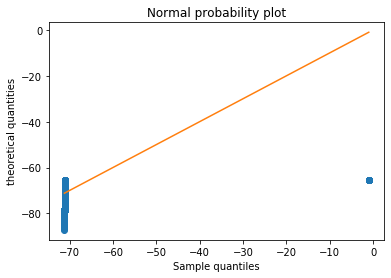

In [27]:
def normality_check(data):
    area_to_left=[(i-0.5)/len(data)
                 for i in range(1,len(data)+1)]
   # print(area_to_left)
   # z_scores=norm.ppf(area_to_left)
   # print(z_scores)
    th_quantiles=norm.ppf(area_to_left,np.mean(data),np.std(data,ddof=1))
    print(th_quantiles)
    plt.plot(np.sort(data),th_quantiles,'o',np.sort(data),np.sort(data))
    plt.xlabel('Sample quantiles')
    plt.ylabel('theoretical quantities')
    plt.title('Normal probability plot')
    plt.show()
    
#normality_check(X)
normality_check(data.Long.sample(5))
normality_check(data.Long)

[]

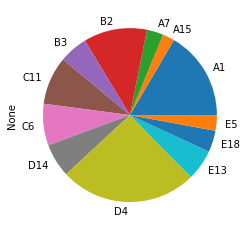

In [45]:
larceny = data[data.OFFENSE_CODE_GROUP.str.contains('Larceny')]
larceny.groupby('DISTRICT').size().plot(kind ='pie')
plt.plot()

[]

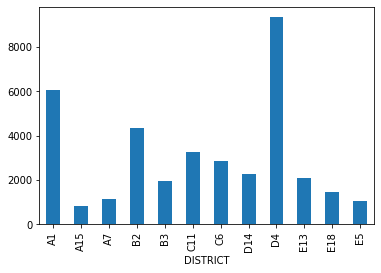

In [10]:
larceny = data[data.OFFENSE_CODE_GROUP.str.contains('Larceny')]
larceny.groupby('DISTRICT').size().plot(kind ='bar')
plt.plot()

#even though overall crime rate is high in B2 district ,but larceny is high in D4 district

In [30]:
larceny.shape           
#There are 17961 records of Larceny incidents, and each record has 17 columns.

(36782, 17)

In [32]:
larceny.groupby('STREET').size().sort_values(ascending = False)

STREET
BOYLSTON ST                 2301
WASHINGTON ST               2211
HUNTINGTON AVE               935
NEWBURY ST                   924
MASSACHUSETTS AVE            708
TREMONT ST                   683
COMMONWEALTH AVE             677
BLUE HILL AVE                674
HARRISON AVE                 598
DORCHESTER AVE               561
ALLSTATE RD                  479
CENTRE ST                    464
BEACON ST                    346
SUMMER ST                    334
RIVER ST                     327
COLUMBUS AVE                 313
COLUMBIA RD                  296
HYDE PARK AVE                262
BORDER ST                    262
CHARLES ST                   257
CAMBRIDGE ST                 248
WARREN ST                    247
AMERICAN LEGION HWY          245
DUDLEY ST                    219
WINTER ST                    218
STUART ST                    183
BROOKLINE AVE                173
GENEVA AVE                   172
STATE ST                     171
WILLIAM T MORRISSEY BLVD     169
   

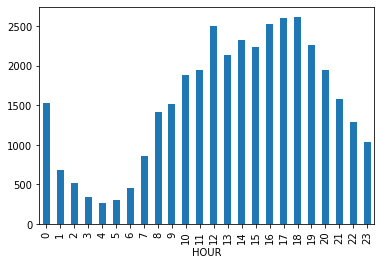

In [33]:
larceny.groupby('HOUR').size().plot(kind= 'bar') 
#Here, we can tell the safest time of the day when larceny is the least possible to happen in Boston is3 to 5 am.
#However, people need to be more careful from 4 to 6 pm.

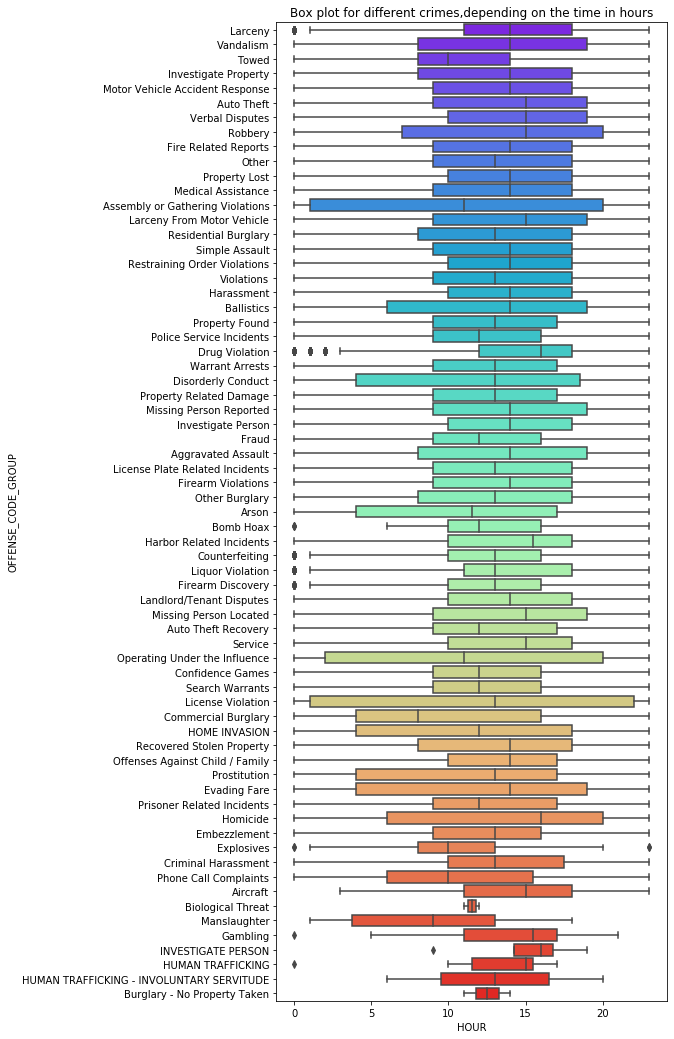

In [46]:
import 
plt.figure(figsize=(7,18))
plt.title("Box plot for different crimes,depending on the time in hours")
sns.boxplot(y="OFFENSE_CODE_GROUP", x="HOUR", data = data  , palette = 'rainbow')

In [39]:
from scipy.stats import ttest_1samp
import numpy as np
long_mean = np.mean(data['HOUR'])
print(long_mean)
tset, pval = ttest_1samp(data['HOUR'], 12.9)
print("p-values")
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

13.118204924891796
p-values
2.4468733270498152e-85
we are rejecting null hypothesis


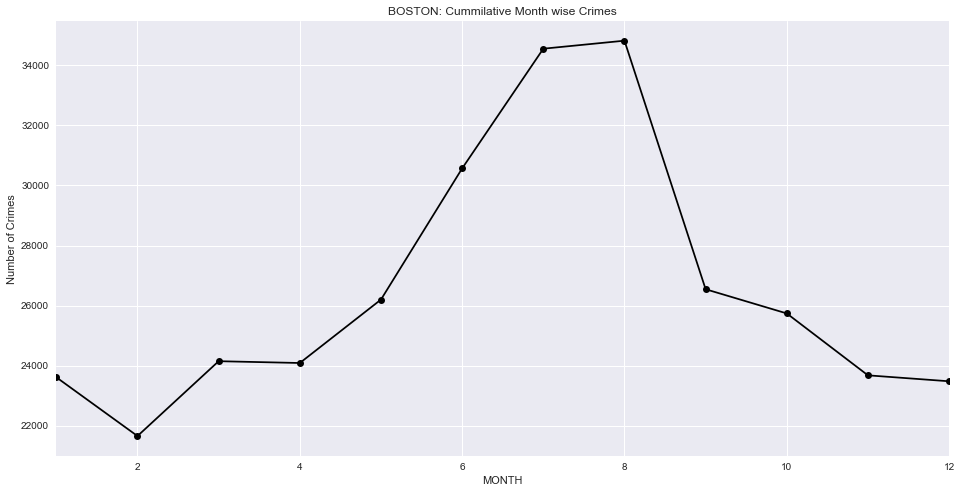

In [22]:
plt.figure(figsize=(16,8))
data.groupby(['MONTH'])['INCIDENT_NUMBER'].count().plot(marker = 'o',color="black")
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Cummilative Month wise Crimes')
plt.show()

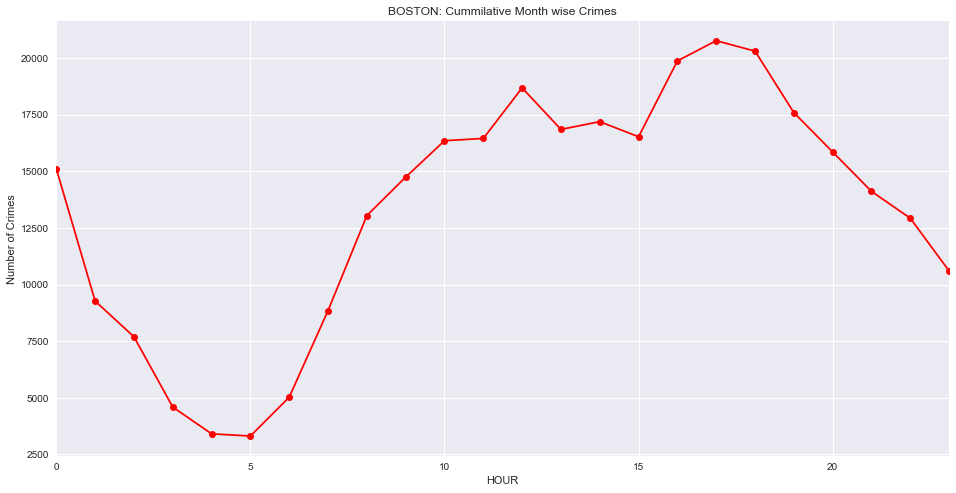

In [21]:
plt.figure(figsize=(16,8))
data.groupby(['HOUR'])['INCIDENT_NUMBER'].count().plot(marker = 'o',color="red")
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Cummilative Month wise Crimes')
plt.show()

In [15]:
from scipy.stats import ttest_1samp
import numpy as np
long_mean = np.mean(data['HOUR'])
print(long_mean)
tset, pval = ttest_1samp(data['HOUR'], 12.9)
print("p-values")
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

13.118204924891796
p-values
2.44687332705e-85
we are rejecting null hypothesis


[]

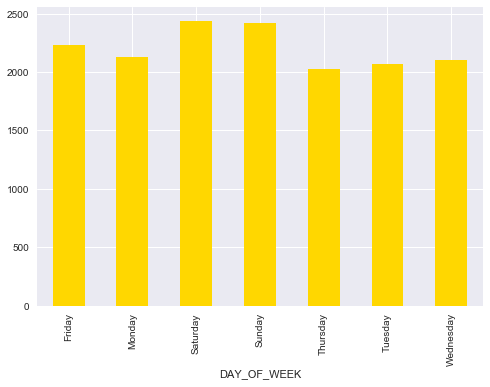

In [39]:
Vandalism = data[data.OFFENSE_CODE_GROUP.str.contains('Vandalism')]
Vandalism.groupby('DAY_OF_WEEK').size().plot(kind ='bar',color="gold")
plt.plot()

[]

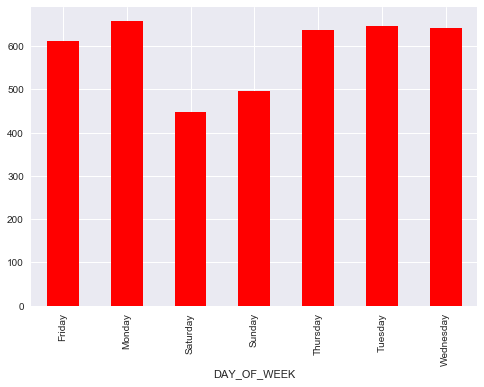

In [33]:
Harassment = data[data.OFFENSE_CODE_GROUP.str.contains('Harassment')]
Harassment.groupby('DAY_OF_WEEK').size().plot(kind ='bar' , color="red")
plt.plot()

[]

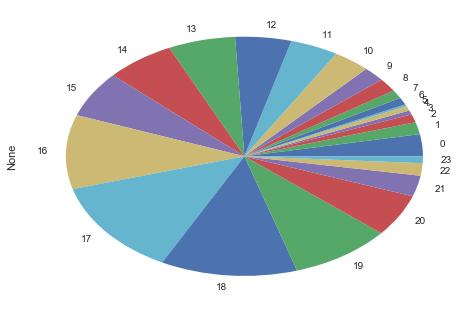

In [11]:
Drug= data[data.OFFENSE_CODE_GROUP.str.contains('Drug Violation')]
Drug.groupby('HOUR').size().plot(kind ='pie')
plt.plot()

[]

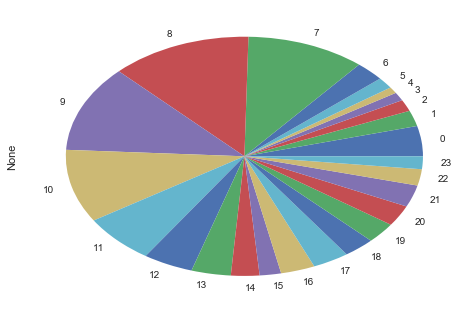

In [12]:
TOWED= data[data.OFFENSE_CODE_GROUP.str.contains('Towed')]
TOWED.groupby('HOUR').size().plot(kind ='pie')
plt.plot()

[]

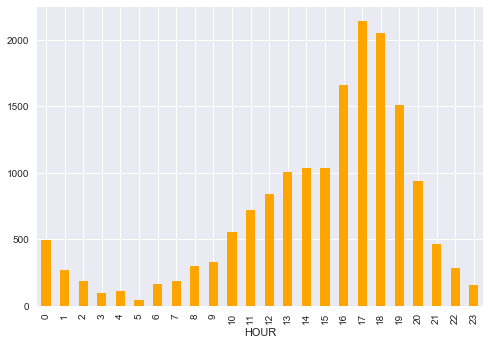

In [13]:
Drug= data[data.OFFENSE_CODE_GROUP.str.contains('Drug Violation')]
Drug.groupby('HOUR').size().plot(kind ='bar',color="orange")
plt.plot()

[]

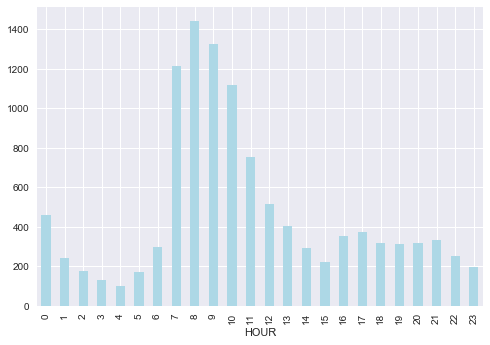

In [14]:
TOWED= data[data.OFFENSE_CODE_GROUP.str.contains('Towed')]
TOWED.groupby('HOUR').size().plot(kind ='bar',color="lightblue")
plt.plot()

In [40]:
import scipy.stats
#Hypo_Test
#H0:No relation between day of the week and type of offence
#H1: There is some association between the day of the week and the type of offence comitted
observed=pd.crosstab(data['DAY_OF_WEEK'], data['OFFENSE_CODE_GROUP'],margins = False) 
chi_2=scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)[0]
p_value=scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)[1]
print('chi_2=',chi_2)
print('p-value=',p_value)
print('Thus H0 is rejected.There is some association between the day of the week and the type of offence comitted')

chi_2= 4353.36833596
p-value= 0.0
Thus H0 is rejected.There is some association between the day of the week and the type of offence comitted


In [43]:
import scipy.stats
#Hypo_Test
#H0:No relation between month of the year and type of offence
#H1: There is some association between the month of the year and the type of offence comitted
observed=pd.crosstab(data['MONTH'], data['OFFENSE_CODE_GROUP'],margins = False) 
chi_2=scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)[0]
p_value=scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)[1]
print('chi_2=',chi_2)
print('p-value=',p_value)
print('H0 is rejected.There is some association between the month of the year and the type of offence comitted')

chi_2= 2917.51040657
p-value= 1.73619383249e-259
H0 is rejected.There is some association between the month of the year and the type of offence comitted


[]

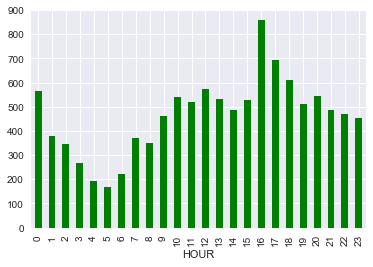

In [52]:
TOWED= data[data.OFFENSE_CODE_GROUP.str.contains('Investigate Property')]
TOWED.groupby('HOUR').size().plot(kind ='bar',color="GREEN")
plt.plot()

[]

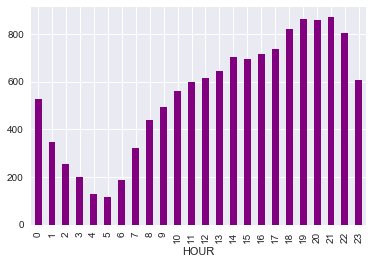

In [56]:
TOWED= data[data.OFFENSE_CODE_GROUP.str.contains('Verbal Disputes')]
TOWED.groupby('HOUR').size().plot(kind ='bar',color="purple")
plt.plot()